**Shibu Mohapatra**

**DATA SCIENCE PROJECT**

## Shibu's Avacado Project 🥑

In this two types of analyzes for predicting avocado prices are displayed.

### **Time Series Analysis** and **Machine Learning Analysis**

I used Prophet for Time Series analysis.

And then I applied Regression and Machine Learning Algorithms to the data; 
* Linear Regression
* Ridge Regression 
* Lasso Regression
* KNN
* SVR 
* Decision Tree
* Random Forest
* PCA, and
* ANOVA Test


In [1]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
from sklearn import svm

In [2]:
# downloading and describing the dataset
df = pd.read_csv('/content/avocado.csv')

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.shape

(18249, 14)

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold  (Small Bags)

4225 - Total number of avocados with PLU 4225 sold  (Large Bags)

4770 - Total number of avocados with PLU 4770 sold  (XLarge Bags)

Weekly 2018 retail scan data for National retail volume (units) and price.

Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Bags of avocados. 

The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Bags of avocados.

Other varieties of avocados (e.g. greenskins) are not included in this table.

In [5]:
df.isnull().sum()     # is there any NULL variable in the dataset

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
df.describe().round(2)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00
mean,24.23,1.41,850644.01,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43,2016.15
std,15.48,0.40,3453545.36,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89,0.94
min,0.00,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00
25%,10.00,1.10,10838.58,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00,2015.00
50%,24.00,1.37,107376.76,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00,2016.00
75%,38.00,1.66,432962.29,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50,2017.00
max,52.00,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00


In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


To summarise the dataset we see;

14 columns (variables) and 18249 rows (observations)

There isn't any NULL variable

data types: float64(9), int64(2), object(3)

there are some unnamed/undefined columns

'region', 'type' and 'date' columns are in object format

In [8]:
# Target of this is to predict the future price of avocados depending on those variables we have; 

# * Type     *Bags(4 units) vs Bundle(one unit)     *Region      *Volume      *Size     *Years

In [9]:
# PREPROCESSING

# drop unnamed column and rename undefined columns;

df = df.drop(['Unnamed: 0'], axis = 1)
df = df.rename(index=str, columns={"4046" : "Small Hass", "4225" : "Large Hass","4770" : "XLarge Hass" })

In [10]:
# convert Date column's format;

df['Date'] =pd.to_datetime(df.Date)
df.sort_values(by=['Date'], inplace=True, ascending=True)
df.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


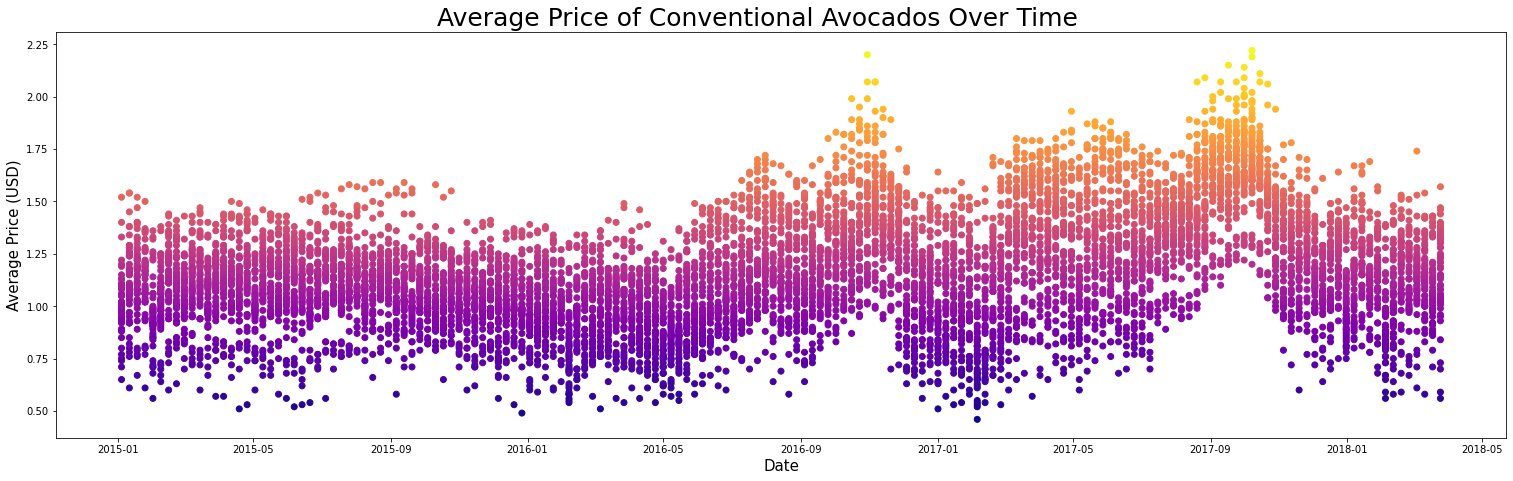

In [11]:
# Average price of Conventional Avocados over time

mask = df['type']== 'conventional'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

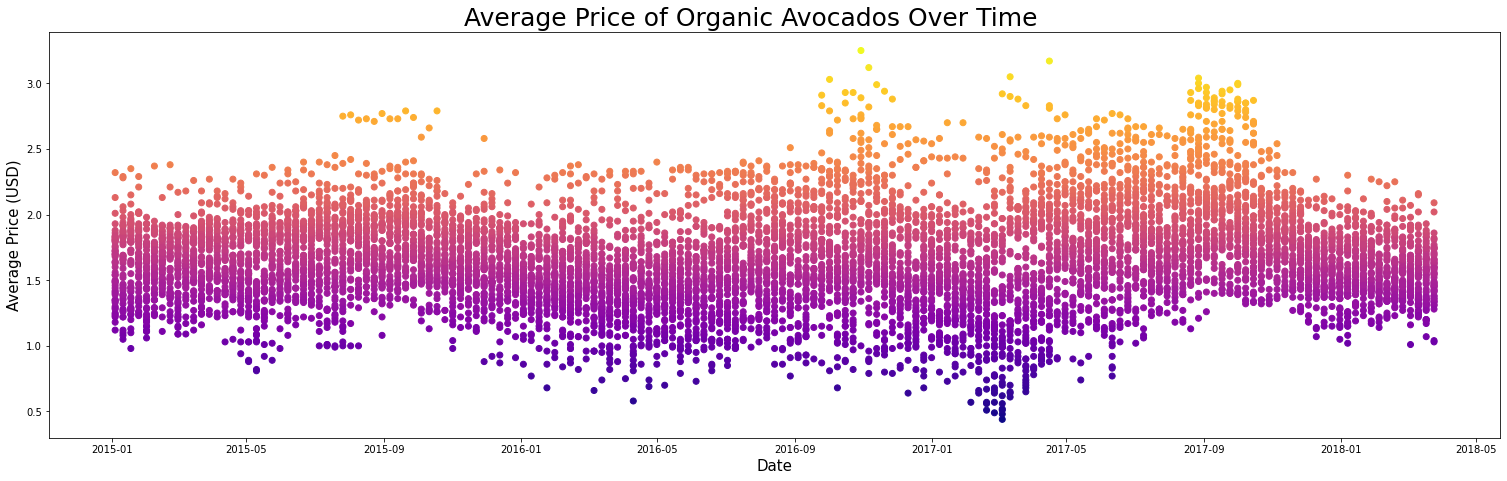

In [12]:
# Average price of Organic Avocados over time

mask = df['type']== 'organic'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

In [13]:
# TIME SERIES ANALYSIS
# Since the data itself is a time series data, I first want to see time series analysis predictions, and then apply ML models.
# Creating a two-column dataset to use in time series analysis;

df2 = df[['Date', 'AveragePrice']]
df2 = df2.set_index('Date')

weekly_df = df2.resample('W').mean()
w_df = weekly_df.reset_index().dropna()

w_df.sort_values(by=['Date'])
w_df.head()

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037


No handles with labels found to put in legend.


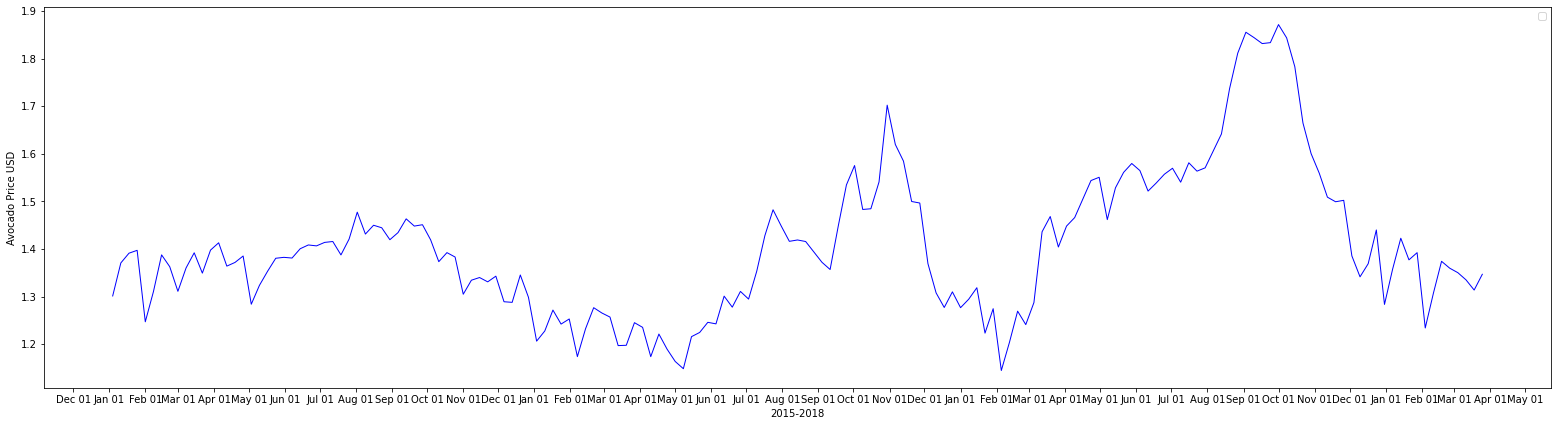

In [14]:
# Plotting the weekly average prices by month;

import matplotlib.dates as mdates

fig = plt.figure(figsize = (27, 7))
ax = plt.axes()
#set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.plot(w_df['Date'],w_df['AveragePrice'],color='b', linewidth=1)
plt.xlabel("2015-2018")
plt.ylabel("Avocado Price USD")
plt.legend()
plt.show()

In [15]:
# Time Series Forecasts using Facebook's Prophet

w_df.columns = ['ds', 'y']

from fbprophet import Prophet

P=Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=False, changepoint_range=1) 
#interval_width sets the uncertainty interval to produce a confidence interval around the forecast

P.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
P.fit(w_df)
future = P.make_future_dataframe(freq='W', periods=4)  # Let's predict the next month's average prices
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
168,2018-03-25
169,2018-04-01
170,2018-04-08
171,2018-04-15
172,2018-04-22


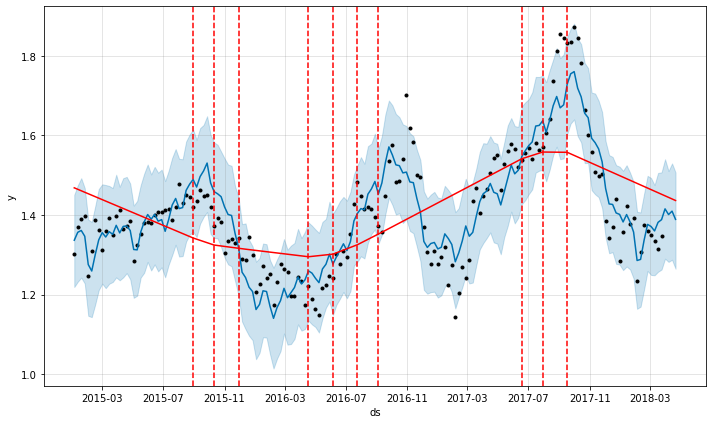

In [16]:
from fbprophet.plot import add_changepoints_to_plot

forecast = P.predict(future)
fig = P.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), P, forecast)

In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
168,2018-03-25,1.388341,1.263089,1.507194
169,2018-04-01,1.415463,1.290337,1.540006
170,2018-04-08,1.401139,1.282224,1.510242
171,2018-04-15,1.409735,1.287648,1.529566
172,2018-04-22,1.389065,1.265069,1.506847


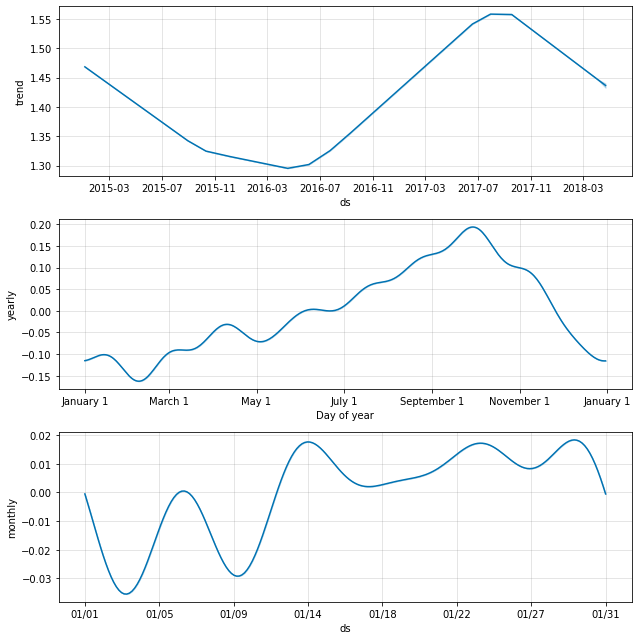

In [18]:
fig2 = P.plot_components(forecast)

In [19]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(P, initial = '365 days', period = '30 days', horizon = '30 days')

df_cv.tail()

INFO:fbprophet:Making 27 forecasts with cutoffs between 2016-01-05 00:00:00 and 2018-02-23 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
111,2018-02-25,1.417445,1.293868,1.558952,1.359630,2018-02-23
112,2018-03-04,1.423801,1.299103,1.541350,1.350185,2018-02-23
113,2018-03-11,1.423063,1.300583,1.559890,1.335093,2018-02-23
114,2018-03-18,1.450260,1.320798,1.575912,1.313704,2018-02-23
115,2018-03-25,1.452254,1.329398,1.568697,1.346852,2018-02-23


In [20]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
23,26 days,0.019392,0.139255,0.102649,0.070090,0.044929,0.340909
24,27 days,0.010346,0.101713,0.075583,0.053046,0.032991,0.590909
25,28 days,0.009362,0.096755,0.082347,0.057307,0.044552,0.545455
26,29 days,0.019108,0.138233,0.116728,0.078919,0.098348,0.454545
27,30 days,0.026886,0.163968,0.152459,0.103676,0.105307,0.181818


In [21]:
np.mean(df_p['mape'])

0.07723124428834151

In [22]:
np.mean(df_p['rmse'])

0.13196903989507985

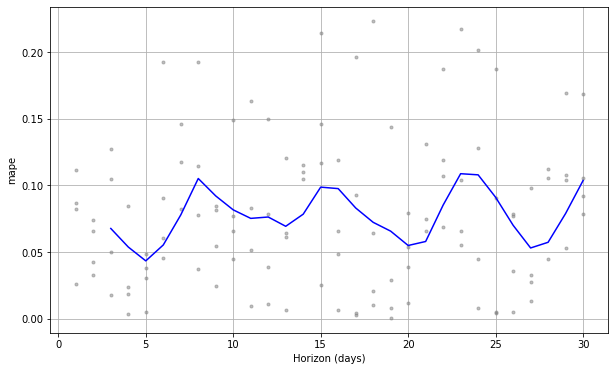

In [23]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
# mean absolute percentage error MAPE  

In [24]:
forecastnew = forecast['ds']
forecastnew2 = forecast['yhat']

forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)

mask = (forecastnew['ds'] > "2018-03-24") & (forecastnew['ds'] <= "2020-09-10")
forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > "2015-01-04") & (forecastnew['ds'] <= "2018-03-25")
forecastnew = forecastnew.loc[mask]
forecastedvalues

,ds,yhat
168,2018-03-25,1.388341
169,2018-04-01,1.415463
170,2018-04-08,1.401139
171,2018-04-15,1.409735
172,2018-04-22,1.389065


Predictions for the next month are as follows -

We already know that y=1.347 for 2018-03-25, and the model prediction is 1.388, which is actually over 3% of the real value.

Red = Predicted Values, Blue = Base Values


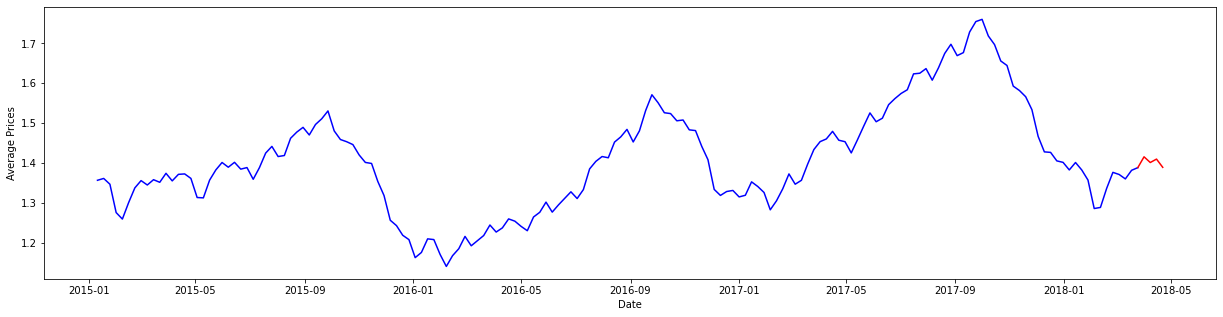

In [25]:
fig, ax1 = plt.subplots(figsize=(21, 5))
ax1.plot(forecastnew.set_index('ds'), color='b')
ax1.plot(forecastedvalues.set_index('ds'), color='r')
ax1.set_ylabel('Average Prices')
ax1.set_xlabel('Date')
print("Red = Predicted Values, Blue = Base Values")

With Facebook Prophet() we obtain forecasts which are off by 8% due to MAPE values. (Accuracy= 92%)

The Prophet predicts future prices in a downward trend.

Let's see what we get from Machine Learning Algorithms

In [26]:
# Dropping the Date column (date format is not suitable for next level analysis (i.e. OHE))
df = df.drop(['Date'], axis = 1)

In [27]:
# Checking if the sample is balanced;
df.groupby('region').size() # Approximately, there are 338 observations from each region, sample seems balanced.

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

In [28]:
len(df.region.unique())

54

In [29]:
df.region.unique() # There are 54 regions but some are subsets of the other regions, i.e: San Francisco-California

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

In [30]:
# basically we can remove states and work on cities rather than analysing both (to prevent multicollinerarity)

regionsToRemove = ['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']
df = df[~df.region.isin(regionsToRemove)]
len(df.region.unique())

43

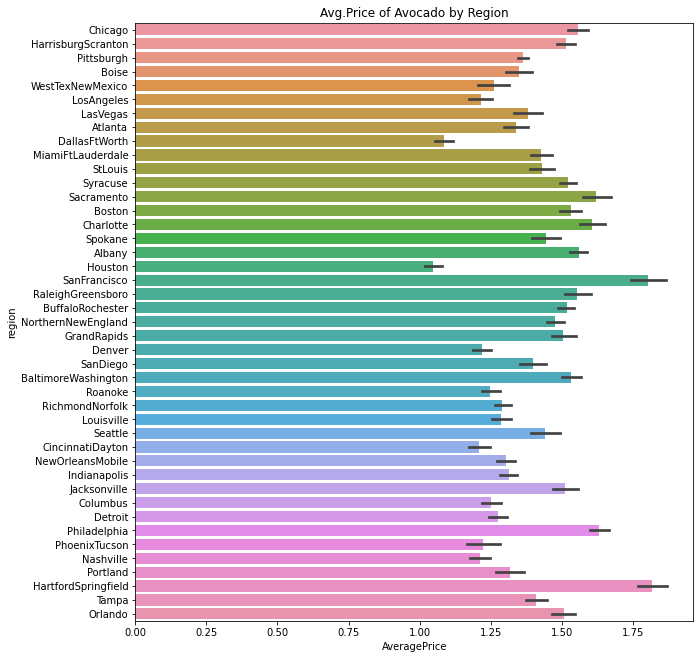

In [31]:
# The average prices by regions

plt.figure(figsize=(10,11))
plt.title("Avg.Price of Avocado by Region")
Av= sns.barplot(x="AveragePrice",y="region",data= df)

In [32]:
type_counts = df.groupby('type').size()
print(type_counts) 

# Types of avocados are also balanced since the ratio is almost 0.5

type
conventional    7267
organic         7264
dtype: int64


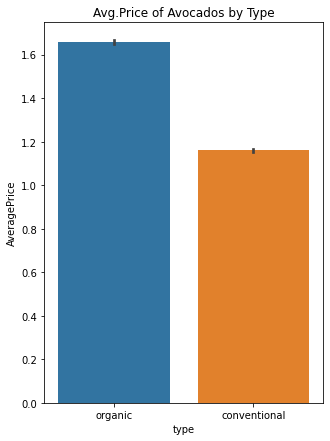

In [33]:
# The average prices of avocados by types; organic or not

plt.figure(figsize=(5,7))
plt.title("Avg.Price of Avocados by Type")
Av= sns.barplot(x="type",y="AveragePrice",data= df)

In [34]:
# Total Bags = Small Bags + Large Bags + XLarge Bags
# To avoid multicollinearity I'll keep S-L-XL bags and drop Total Bags
# But before droping we'd better to see the correlation between those columns:

df[['Small Hass', "Large Hass", "XLarge Hass",'Small Bags','Large Bags','XLarge Bags','Total Volume','Total Bags']].corr()

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,Total Volume,Total Bags
Small Hass,1.000000,0.505321,0.412247,0.653724,0.348216,0.454440,0.890380,0.684041
Large Hass,0.505321,1.000000,0.580107,0.563730,0.265454,0.308823,0.787495,0.577115
XLarge Hass,0.412247,0.580107,1.000000,0.437290,0.121320,0.492822,0.576676,0.429245
Small Bags,0.653724,0.563730,0.437290,1.000000,0.238270,0.658700,0.836906,0.956905
Large Bags,0.348216,0.265454,0.121320,0.238270,1.000000,0.080479,0.429051,0.509324
XLarge Bags,0.454440,0.308823,0.492822,0.658700,0.080479,1.000000,0.549505,0.622964
Total Volume,0.890380,0.787495,0.576676,0.836906,0.429051,0.549505,1.000000,0.869796
Total Bags,0.684041,0.577115,0.429245,0.956905,0.509324,0.622964,0.869796,1.000000


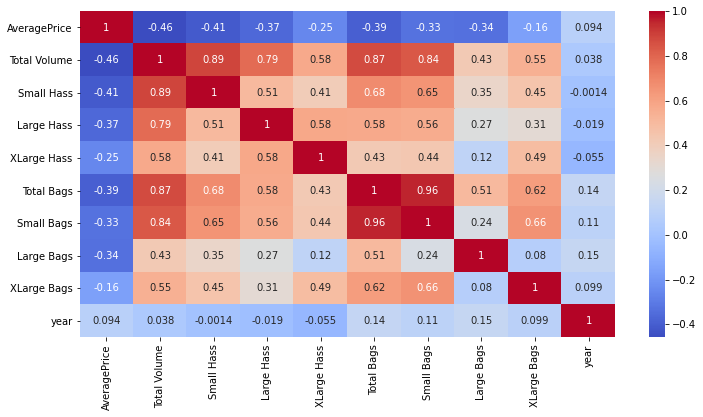

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

# darker = stronger

There is a high correlation between those pairs: 

small hass & total volume  (0.89)      

total bags & total volume  (0.87)      

small bags & total bags    (0.96)      

Small Hass avocados are the most preferred/sold type in the US and customers tend to buy those avocados as bulk, not bag.

Retailers want to increase the sales of bagged avocados instead of bulks. 
They think this is more advantageous for them.

Total Bags variable has a very high correlation with Total Volume (Total Sales) and Small Bags, so we can say that most of the bagged sales comes from the small bags.

In [36]:
df_V = df.drop(['AveragePrice', 'Total Volume', 'Total Bags'], axis = 1).groupby('year').agg('sum')
df_V

,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags
year,,,,,,
2015,3.956835e+08,3.816794e+08,34551068.97,1.424565e+08,28409959.31,1324210.40
2016,3.373537e+08,3.684409e+08,37822298.99,2.630756e+08,80734611.45,4894984.66
2017,3.667922e+08,3.405079e+08,22968983.86,2.811956e+08,93246243.70,5384099.35
2018,1.013592e+08,8.963867e+07,5804442.33,7.920550e+07,28310113.38,1589371.50


Text(0, 0.5, '')

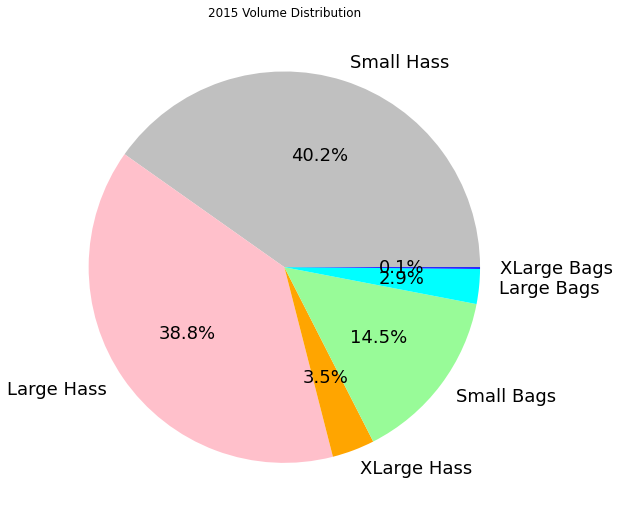

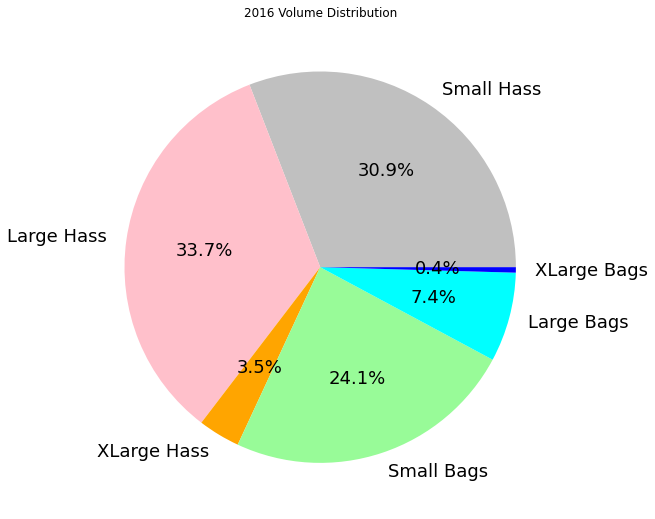

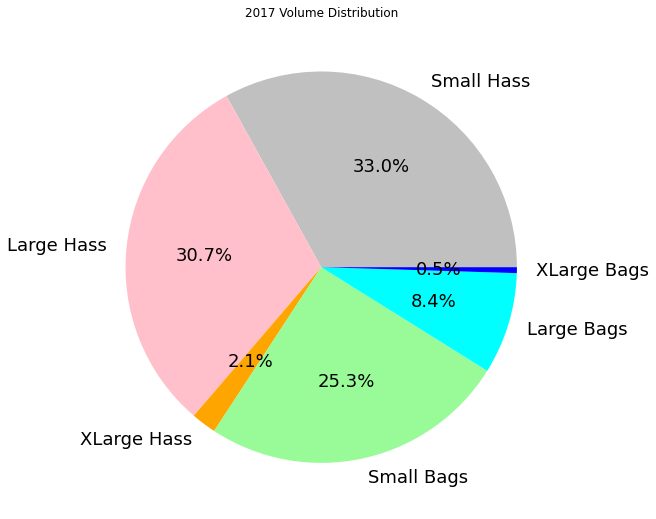

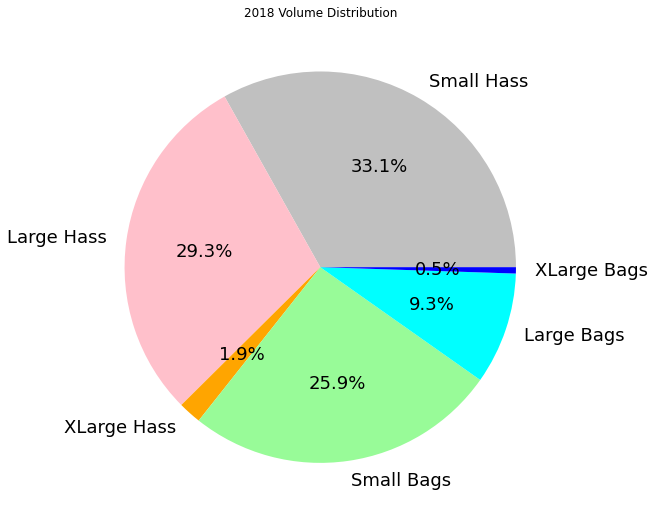

In [37]:
indexes = ['Small Hass', 'Large Hass', 'XLarge Hass', 'Small Bags', 'Large Bags', 'XLarge Bags']
series = pd.DataFrame({'2015': df_V.loc[[2015],:].values.tolist()[0],
                      '2016': df_V.loc[[2016],:].values.tolist()[0],
                      '2017': df_V.loc[[2017],:].values.tolist()[0],
                      '2018': df_V.loc[[2018],:].values.tolist()[0]}, index=indexes)
series.plot.pie(y='2015',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2015 Volume Distribution').set_ylabel('')
series.plot.pie(y='2016',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2016 Volume Distribution').set_ylabel('')
series.plot.pie(y='2017',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2017 Volume Distribution').set_ylabel('')
series.plot.pie(y='2018',figsize=(9, 9), autopct='%1.1f%%', colors=['silver', 'pink', 'orange', 'palegreen', 'aqua', 'blue'], fontsize=18, legend=False, title='2018 Volume Distribution').set_ylabel('')

In [38]:
# Total Bags = Small Bags + Large Bags + XLarge Bags

df = df.drop(['Total Bags'], axis = 1)

In [39]:
# Total Volume = Small Hass +Large Hass +XLarge Hass + Total Bags , to avoid multicollinearity I also drop Total Volume column.

df = df.drop(['Total Volume'], axis = 1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14531 entries, 9593 to 8574
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  14531 non-null  float64
 1   Small Hass    14531 non-null  float64
 2   Large Hass    14531 non-null  float64
 3   XLarge Hass   14531 non-null  float64
 4   Small Bags    14531 non-null  float64
 5   Large Bags    14531 non-null  float64
 6   XLarge Bags   14531 non-null  float64
 7   type          14531 non-null  object 
 8   year          14531 non-null  int64  
 9   region        14531 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 1.8+ MB


In [41]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = df.corr(method='pearson')
print(correlations)

              AveragePrice  Small Hass  ...  XLarge Bags   year
AveragePrice         1.000      -0.412  ...       -0.158  0.094
Small Hass          -0.412       1.000  ...        0.454 -0.001
Large Hass          -0.365       0.505  ...        0.309 -0.019
XLarge Hass         -0.253       0.412  ...        0.493 -0.055
Small Bags          -0.329       0.654  ...        0.659  0.109
Large Bags          -0.335       0.348  ...        0.080  0.150
XLarge Bags         -0.158       0.454  ...        1.000  0.099
year                 0.094      -0.001  ...        0.099  1.000

[8 rows x 8 columns]


In [42]:
# Standardizing (scaling) the variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.loc[:,'Small Hass':'XLarge Bags']= scaler.fit_transform(df.loc[:,'Small Hass':'XLarge Bags']) 
df.head()

,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,type,year,region
9593,1.49,-0.403,-0.475,-0.347,-0.420,-0.371,-0.231,organic,2015,Chicago
10009,1.68,-0.408,-0.587,-0.347,-0.407,-0.371,-0.231,organic,2015,HarrisburgScranton
1819,1.52,-0.394,-0.331,-0.269,-0.336,-0.286,-0.231,conventional,2015,Pittsburgh
9333,1.64,-0.408,-0.580,-0.347,-0.426,-0.367,-0.231,organic,2015,Boise
2807,0.75,1.701,0.483,0.414,0.912,-0.306,-0.231,conventional,2015,WestTexNewMexico


In [43]:
# Specifying dependent and independent variables

X = df.drop(['AveragePrice'], axis = 1)
y = df['AveragePrice']
y=np.log1p(y)

In [44]:
# Labeling the categorical variables

Xcat=pd.get_dummies(X[["type","region"]], drop_first = True)

In [45]:
Xnum=X[["Small Hass","Large Hass","XLarge Hass","Small Bags","Large Bags","XLarge Bags"]]

In [46]:
X= pd.concat([Xcat, Xnum], axis = 1) # Concatenate dummy categorcal variables and numeric variables
X.shape

(14531, 49)

In [47]:
F_DF = pd.concat([y,X],axis=1)
F_DF.head(2)

,AveragePrice,type_organic,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Nashville,region_NewOrleansMobile,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_WestTexNewMexico,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags
9593,0.912,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.403,-0.475,-0.347,-0.420,-0.371,-0.231
10009,0.986,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.408,-0.587,-0.347,-0.407,-0.371,-0.231


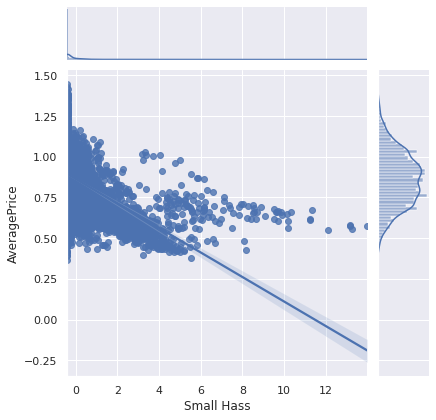

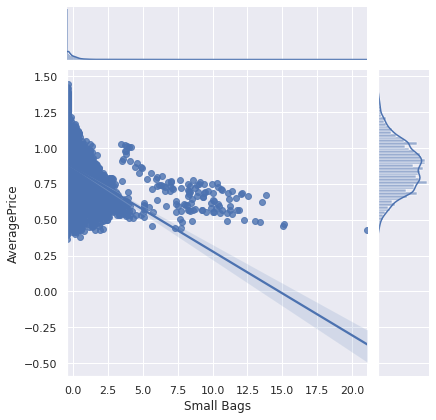

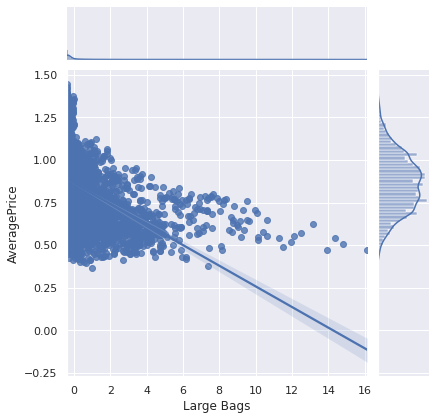

In [48]:
# Just before the regression analysis, I want to visualise the highly correlated Variables with the Average Prices;

import seaborn as sns
sns.set(color_codes=True)
sns.jointplot(x="Small Hass", y="AveragePrice", data=F_DF, kind="reg");
sns.jointplot(x="Small Bags", y="AveragePrice", data=F_DF, kind="reg");
sns.jointplot(x="Large Bags", y="AveragePrice", data=F_DF, kind="reg");

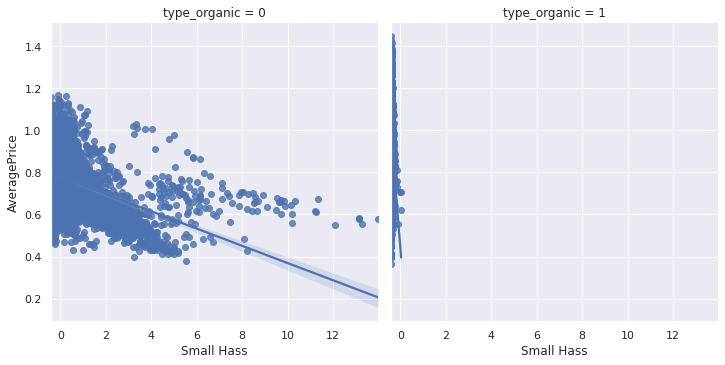

In [49]:
sns.lmplot(x="Small Hass", y="AveragePrice", col="type_organic", data=F_DF, col_wrap=2);

# Graphs depict that organic avocados have less elasticity to the price, compared to conventional ones.

In [50]:
# TRAIN and TEST SPLIT

# Since the data is a time series data (gives weekly avocado prices between Jan 2015 and Apr 2018)
# I sort it by Date and then split it due to date manually (not randomly), to preserve the 'times series effect' on it.
# I determined the split ratio as 0.30, so train and test data are just as follows;

X_train=X[0:10172]
y_train=y[0:10172]
X_test=X[10172:]
y_test=y[10172:]

### **Implementing different learning models**

#### **Multiple Linear Regression** 

In [51]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

print ("R2 of Linear Regresson:", LinReg.score(X_train,y_train) )

R2 of Linear Regresson: 0.6456215316684979


In [52]:
print('MAE: ',metrics.mean_absolute_error(y_test, LinReg.predict(X_test)))
print('MSE: ',metrics.mean_squared_error(y_test, LinReg.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, LinReg.predict(X_test))))

MAE:  0.1129710253478897
MSE:  0.020701387918018038
RMSE: 0.14387976896707208


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



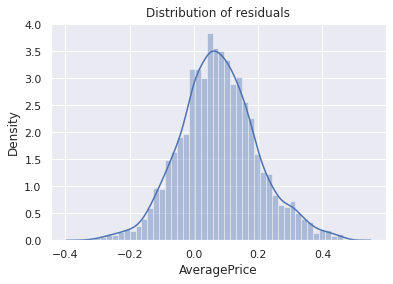

In [53]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - LinReg.predict(X_test))
plt.title('Distribution of residuals');

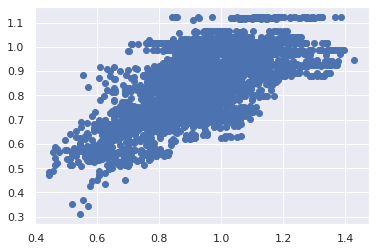

In [54]:
plt.scatter(y_test,LinReg.predict(X_test))

In [55]:
# we can confirm the R2 value (moreover, get the R2 Adj.value) of the model by statsmodels library of python
import statsmodels.api as sm
X_train = sm.add_constant(X_train) # adding a constant
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     376.3
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:47:43   Log-Likelihood:                 9124.8
No. Observations:               10172   AIC:                        -1.815e+04
Df Residuals:                   10122   BIC:                        -1.779e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [56]:
X_train=X[0:10172]
y_train=y[0:10172]
X_test=X[10172:]
y_test=y[10172:]

#### **LASSO and RIDGE Regressions**

In [57]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-5,3,20)

clf = GridSearchCV(estimator=linear_model.Ridge(), param_grid=dict(alpha=alphas), cv=10)
clf.fit(X_train, y_train)
optlamGSCV_R = clf.best_estimator_.alpha
print('Optimum regularization parameter (Ridge):', optlamGSCV_R)

clf = GridSearchCV(estimator=linear_model.Lasso(), param_grid=dict(alpha=alphas), cv=10)
clf.fit(X_train, y_train)
optlamGSCV_L= clf.best_estimator_.alpha
print('Optimum regularization parameter (Lasso):', optlamGSCV_L)

Optimum regularization parameter (Ridge): 1.1288378916846884
Optimum regularization parameter (Lasso): 1e-05


In [58]:
ridge = linear_model.Ridge(alpha = optlamGSCV_R) 
ridge.fit(X_train, y_train)
print('RMSE value of the Ridge Model is: ',np.sqrt(metrics.mean_squared_error(y_test, ridge.predict(X_test))))

RMSE value of the Ridge Model is:  0.14371043205166203


In [59]:
ridge.score(X_train, y_train) #Returns the coefficient of determination (R2) of the prediction.

0.6454885606690972

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



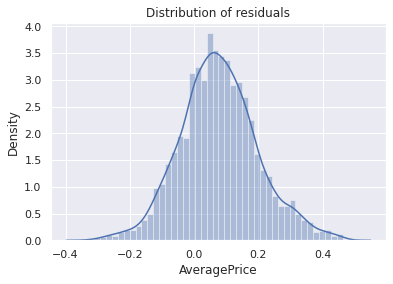

In [60]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - ridge.predict(X_test))
plt.title('Distribution of residuals');

In [61]:
lasso = linear_model.Lasso(alpha = optlamGSCV_L)
lasso.fit(X_train, y_train)
print('RMSE value of the Lasso Model is: ',np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))))

RMSE value of the Lasso Model is:  0.1437498061034761


In [62]:
lasso.score(X_train, y_train) #Returns the coefficient of determination R^2 of the prediction.

0.6455331192227598

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



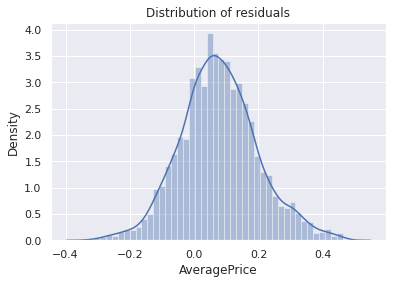

In [63]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - lasso.predict(X_test))
plt.title('Distribution of residuals');

Lasso picked 49 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

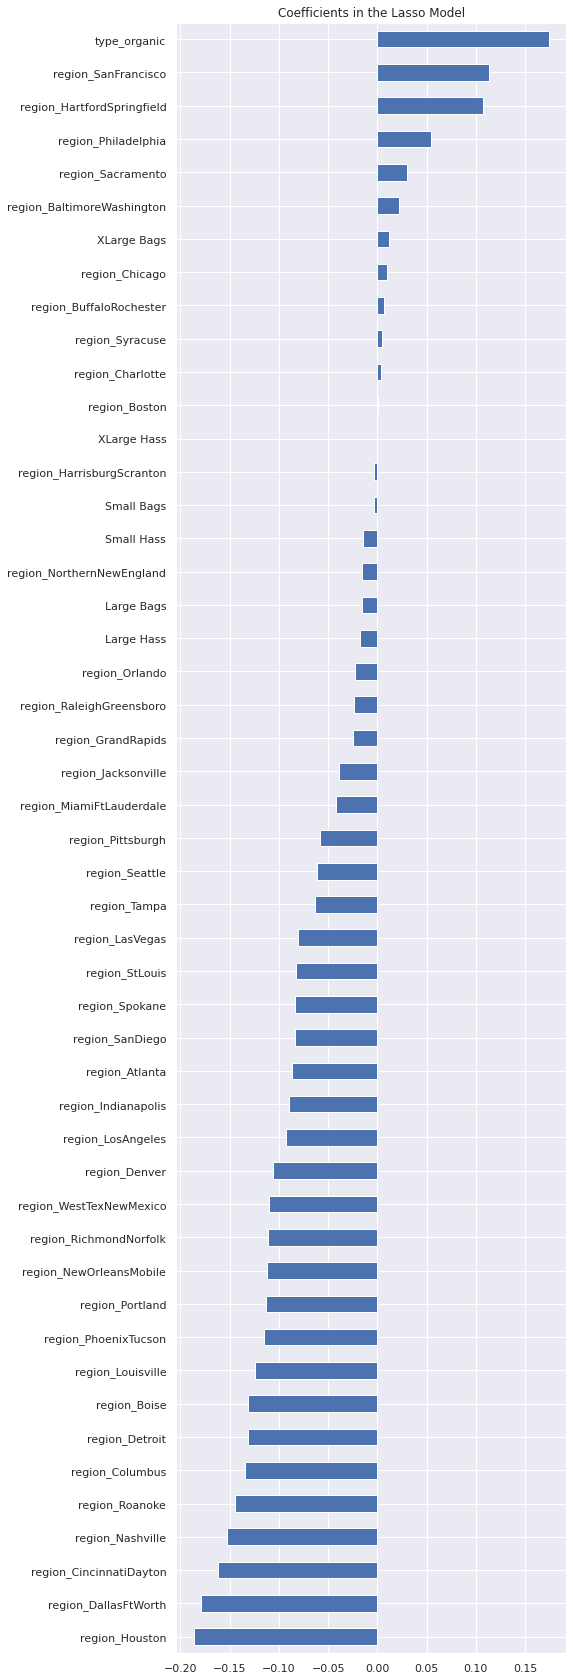

In [64]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")
imp_coef = pd.concat([coef.sort_values()]) #plot all
matplotlib.rcParams['figure.figsize'] = (7.0, 30.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

According to the RMSE results, Ridge works best compared to linear regression and lasso.

The other ML Models' RMSE values

#### **KNN Regressor**

In [65]:
from sklearn import neighbors
from math import sqrt

Knn = neighbors.KNeighborsRegressor()
Knn.fit(X_train, y_train)  
error = sqrt(metrics.mean_squared_error( y_test, Knn.predict(X_test))) 
print('RMSE value of the KNN Model is:', error)

RMSE value of the KNN Model is: 0.14178100684761086


In [66]:
Knn.score(X_train, y_train)  # R2 of the KNN model

0.9274204661840991

#### **SVR Regressor**

In [67]:
from sklearn.svm import SVR

# First, let's choose which kernel is the best for our data

for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_train, y_train)
    print(k,confidence)

linear 0.64201988791237
poly 0.7666695753740924
rbf 0.7948267556500264
sigmoid -912617.2153032974


Intuitively, the gamma defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.

The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. 

For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. 

A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. 

In other words C behaves as a regularization parameter in the SVM.

In [68]:
Svr=SVR(kernel='rbf', C=1, gamma= 0.5)   # Parameter Tuning to get the best accuracy

Svr.fit(X_train,y_train)
print(Svr.score(X_train,y_train))

0.820813588218011


In [69]:
error = sqrt(metrics.mean_squared_error(y_test,Svr.predict(X_test))) #calculate rmse
print('RMSE value of the SVR Model is:', error)

RMSE value of the SVR Model is: 0.13543908976583424


In [70]:
Svr.predict(X_test)[0:5]  # print the first 5 predictions of our test set

array([0.68219164, 0.84158904, 0.89951787, 0.99830621, 1.15097328])

In [71]:
y_test[0:5]

16687    0.784
14938    0.779
16157    0.928
15521    1.099
15680    1.281
Name: AveragePrice, dtype: float64

#### **Decision Tree Regressor**

In [72]:
# Determining the best depth
from sklearn.tree import DecisionTreeRegressor

minDepth = 100
minRMSE = 100000

for depth in range(2,10):
  tree_reg = DecisionTreeRegressor(max_depth=depth)
  tree_reg.fit(X_train, y_train)
  y_pred = tree_reg.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  print("Depth:",depth,", MSE:", mse)
  print("Depth:",depth, ",RMSE:", rmse)
  
  if rmse < minRMSE:
    minRMSE = rmse
    minDepth = depth
       
print("MinDepth:", minDepth)
print("MinRMSE:", minRMSE)

Depth: 2 , MSE: 0.023931594538363427
Depth: 2 ,RMSE: 0.15469839862895618
Depth: 3 , MSE: 0.02505843106630324
Depth: 3 ,RMSE: 0.15829855042388494
Depth: 4 , MSE: 0.026143874511720025
Depth: 4 ,RMSE: 0.1616906754012736
Depth: 5 , MSE: 0.025997904382941806
Depth: 5 ,RMSE: 0.16123865660238493
Depth: 6 , MSE: 0.02539001578694684
Depth: 6 ,RMSE: 0.1593424481641563
Depth: 7 , MSE: 0.025398764727183724
Depth: 7 ,RMSE: 0.15936989906247578
Depth: 8 , MSE: 0.024591795614817686
Depth: 8 ,RMSE: 0.15681771460781363
Depth: 9 , MSE: 0.02422832847810764
Depth: 9 ,RMSE: 0.15565451640767652
MinDepth: 2
MinRMSE: 0.15469839862895618


In [73]:
DTree=DecisionTreeRegressor(max_depth=minDepth)
DTree.fit(X_train,y_train)
print(DTree.score(X_train,y_train))  

0.5532570096878549


In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, DTree.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, DTree.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, DTree.predict(X_test))))

MAE: 0.12232154747783439
MSE: 0.023931594538363195
RMSE: 0.1546983986289554


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



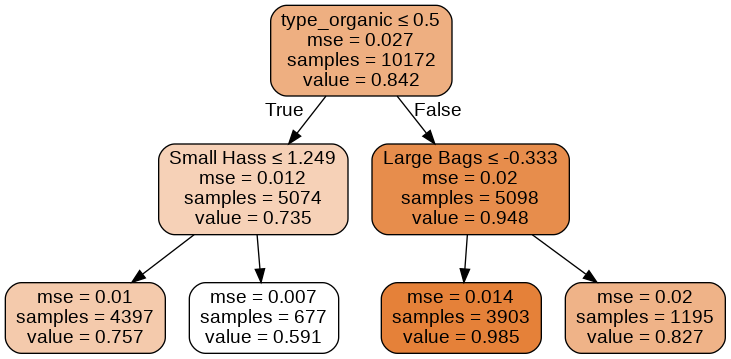

In [75]:
        
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DTree, out_file=dot_data, feature_names = X.columns, 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

# We obtain a 2 depth figure :)

#### **Random Forest**

In [76]:
from sklearn.ensemble import RandomForestRegressor
RForest = RandomForestRegressor()
RForest.fit(X_train,y_train)
print(RForest.score(X_train,y_train))  

0.9848918635919747


In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, RForest.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, RForest.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RForest.predict(X_test))))

MAE: 0.11423897625397772
MSE: 0.021842456633519528
RMSE: 0.1477919369705923


#### **PCA (Principal Component Analysis)**

In [78]:
df.head()

,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,type,year,region
9593,1.49,-0.403,-0.475,-0.347,-0.420,-0.371,-0.231,organic,2015,Chicago
10009,1.68,-0.408,-0.587,-0.347,-0.407,-0.371,-0.231,organic,2015,HarrisburgScranton
1819,1.52,-0.394,-0.331,-0.269,-0.336,-0.286,-0.231,conventional,2015,Pittsburgh
9333,1.64,-0.408,-0.580,-0.347,-0.426,-0.367,-0.231,organic,2015,Boise
2807,0.75,1.701,0.483,0.414,0.912,-0.306,-0.231,conventional,2015,WestTexNewMexico


In [79]:
mean_sepal_length = df['AveragePrice'].mean()
mean_sepal_length

std_dev_sepal_length = df['Small Bags'].std()
std_dev_sepal_length

(1.49-mean_sepal_length)/std_dev_sepal_length


0.08245260281953024

In [80]:
feature = ['AveragePrice', 'Small Bags', 'Large Bags', 'XLarge Bags']

# separating features
x = df.loc[:,feature]

# separating target
y = df.loc[:,'type']

#Standardising features
x = StandardScaler().fit_transform(x)

In [81]:
standardised_values = pd.DataFrame(x,columns=feature)
standardised_values

,AveragePrice,Small Bags,Large Bags,XLarge Bags
0,0.200,-0.420,-0.371,-0.231
1,0.661,-0.407,-0.371,-0.231
2,0.273,-0.336,-0.286,-0.231
3,0.564,-0.426,-0.367,-0.231
4,-1.595,0.912,-0.306,-0.231
...,...,...,...,...
14526,0.831,-0.403,-0.334,-0.231
14527,0.030,-0.329,-0.340,-0.231
14528,-0.212,0.309,0.853,-0.157
14529,0.807,-0.188,-0.210,-0.231


In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pct = pca.fit_transform(x)
principal_df = pd.DataFrame(pct,columns=['PC_1','PC_2'])
finaldf= pd.concat([principal_df,df[['type']]],axis=1)

# finaldf.head()

In [83]:
pca.explained_variance_ratio_ 

array([0.48505991, 0.27306195])

#### **ANOVA (Test)**

### Statistical method
- Normality test
- T test
- Chi-square test
- F test
- ANOVA (one-way)
- ANOVA (two-way)

In [84]:
# Statistics library
from scipy.stats import norm
from scipy import stats
import scipy
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.anova as anova

# random value
from numpy.random import *

# Visualization
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns

**Data loading and checks**

In [85]:
df.head()

,AveragePrice,Small Hass,Large Hass,XLarge Hass,Small Bags,Large Bags,XLarge Bags,type,year,region
9593,1.49,-0.403,-0.475,-0.347,-0.420,-0.371,-0.231,organic,2015,Chicago
10009,1.68,-0.408,-0.587,-0.347,-0.407,-0.371,-0.231,organic,2015,HarrisburgScranton
1819,1.52,-0.394,-0.331,-0.269,-0.336,-0.286,-0.231,conventional,2015,Pittsburgh
9333,1.64,-0.408,-0.580,-0.347,-0.426,-0.367,-0.231,organic,2015,Boise
2807,0.75,1.701,0.483,0.414,0.912,-0.306,-0.231,conventional,2015,WestTexNewMexico


In [86]:
# Null value
df.isnull().sum()

AveragePrice    0
Small Hass      0
Large Hass      0
XLarge Hass     0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

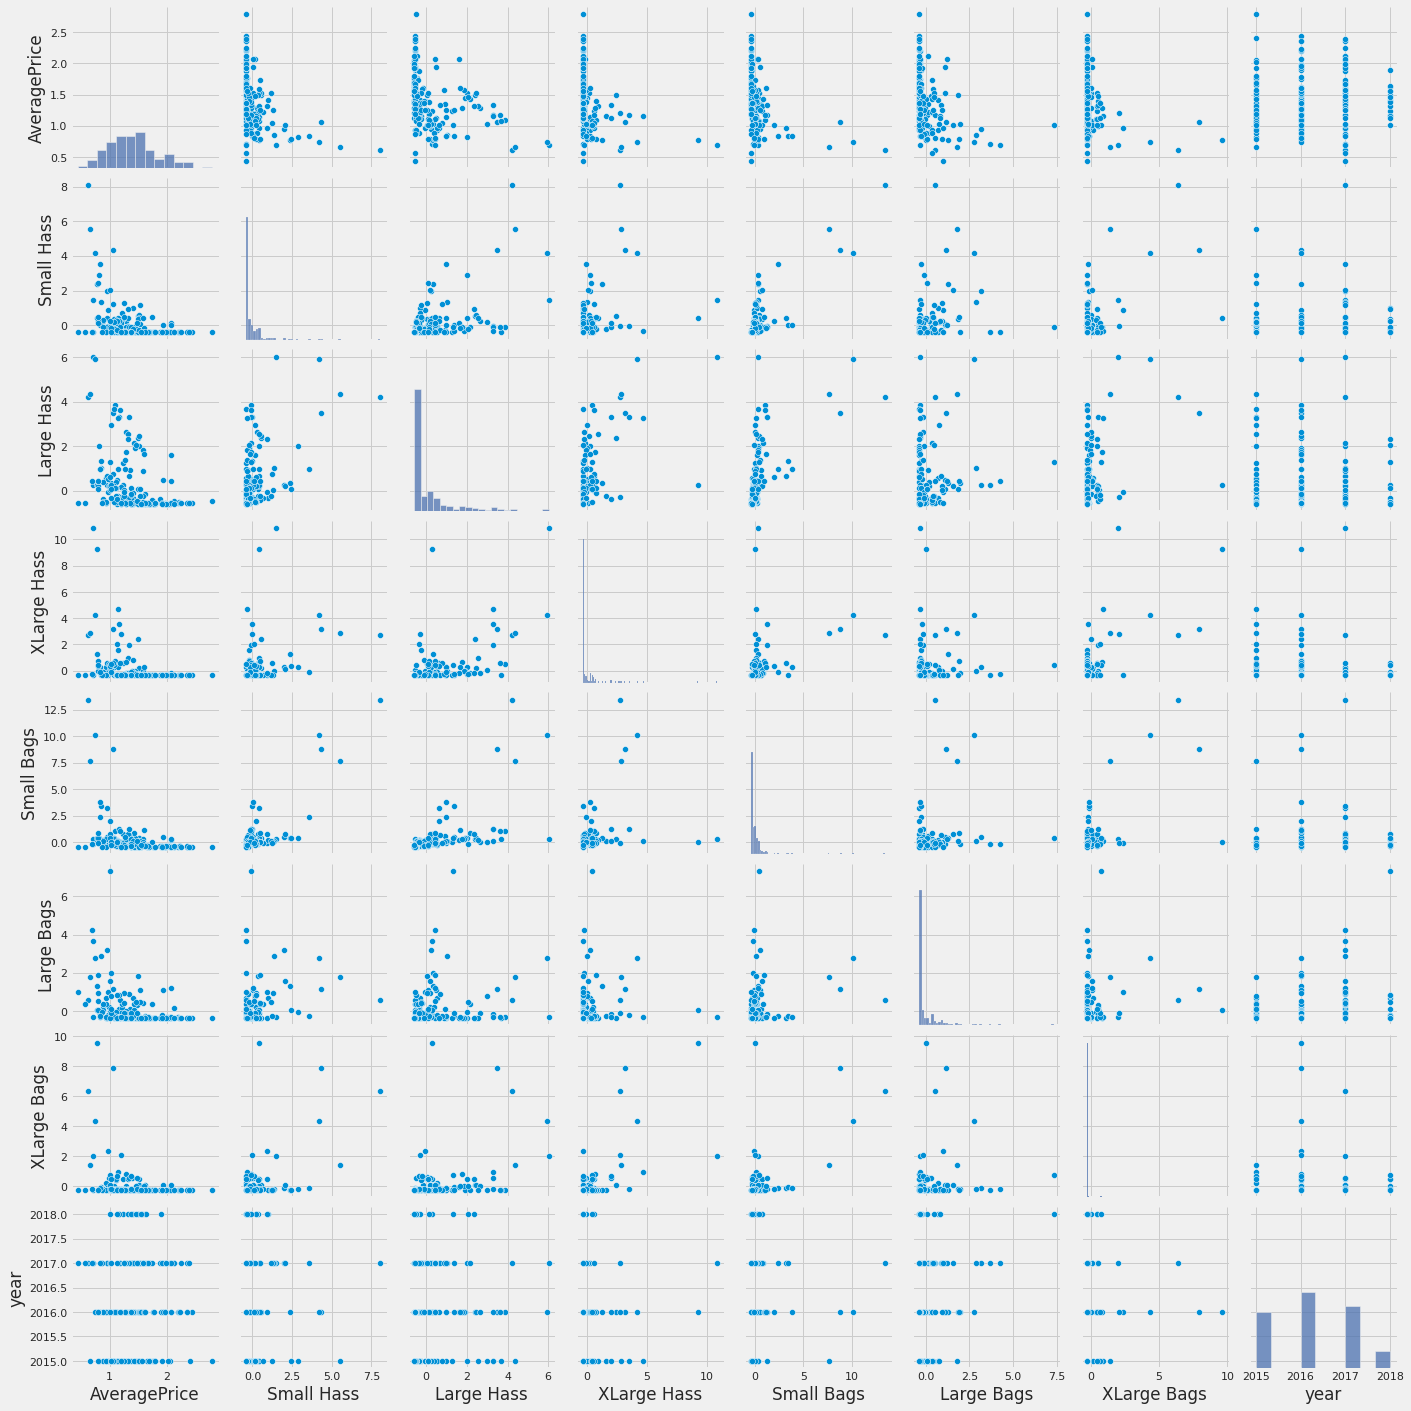

In [87]:
sns.pairplot(df.sample(200))

**Normality test**
Perform normality test of average price

**Visualization check**
distplot and qqplot with rawdata

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Probability plot')

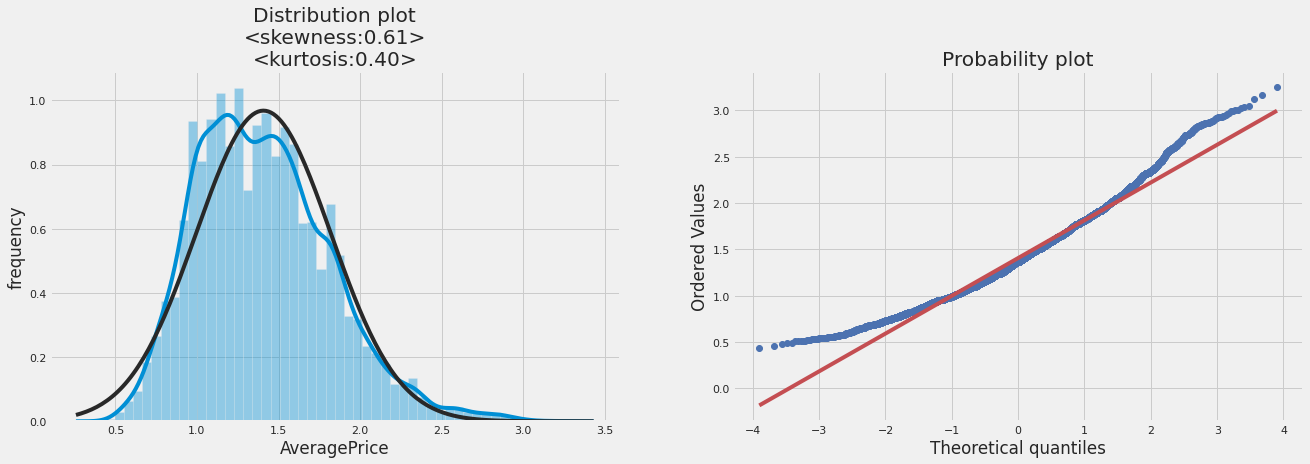

In [88]:
# data
data = df["AveragePrice"]

# calculation of skew and kurtosis
skew = scipy.stats.skew(data)
kurt = scipy.stats.kurtosis(data)

# basic check with 
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.distplot(data, fit=norm, ax=ax[0])
ax[0].set_ylabel("frequency")
ax[0].set_title("Distribution plot\n<skewness:%.2f>\n<kurtosis:%.2f>" % (skew,kurt))
stats.probplot(data, plot=ax[1])
ax[1].set_title("Probability plot")

**Change raw data to log.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Probability plot')

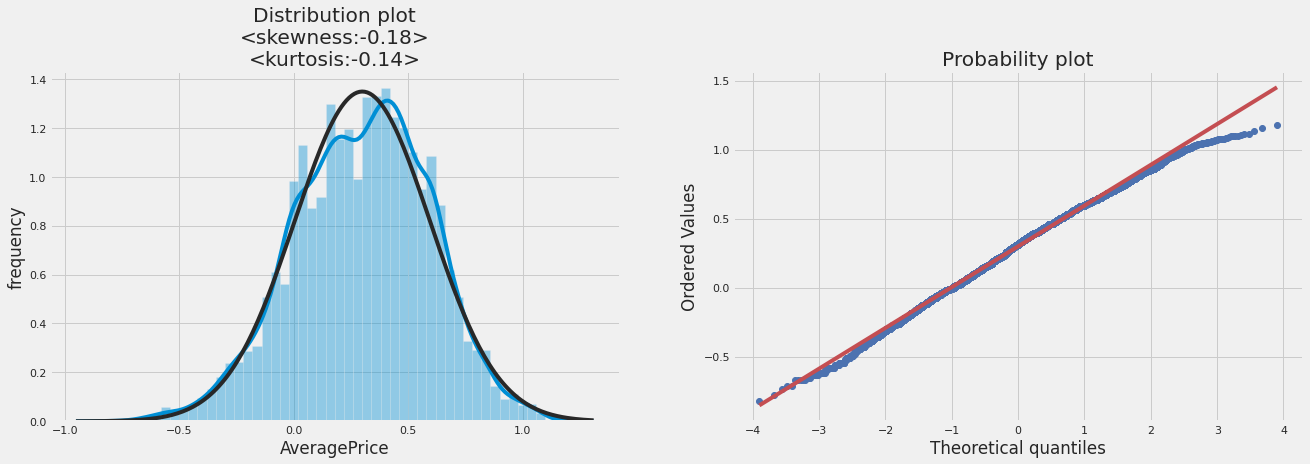

In [89]:
# data
data = np.log(df["AveragePrice"])

# calculation of skew and kurtosis
skew = scipy.stats.skew(data)
kurt = scipy.stats.kurtosis(data)

# basic check with 
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.distplot(data, fit=norm, ax=ax[0])
ax[0].set_ylabel("frequency")
ax[0].set_title("Distribution plot\n<skewness:%.2f>\n<kurtosis:%.2f>" % (skew,kurt))
stats.probplot(data, plot=ax[1])
ax[1].set_title("Probability plot")

- The distribution is closer to the left because sker is greater than 0. 
- In this case, it may be possible to approximate the normal distribution by taking the logarithm. 
- As a result, the regularity was improved.

**Shapiro Wilk test**
The null hypothesis is that the population is normally distributed.

In [90]:
# data
data = np.log(df["AveragePrice"])

# with stats model
WS, p = stats.shapiro(data.sample(4999))

In [91]:
print("p value:{}".format(p))

p value:1.4564904837754966e-10


**p value is small, so we can reject the null hypothesis.**

**That is, it is not a normal distribution.**

**Kolmogorov–Smirnov test**

In [92]:
# data
data = np.log(df["AveragePrice"])

# with stats model
KS, p = stats.kstest(data, "norm")

In [93]:
print("p value:{}".format(p))

p value:0.0


This data does not return the value normally.

**Anderson-Darling test**

In [94]:
# data
data = np.log(df["AveragePrice"])

statistic, critical_values, significance_level = scipy.stats.anderson(data, "norm")

In [95]:
print("critical values:{}".format(critical_values))
print("significant_level:{}".format(significance_level))

critical values:[0.576 0.656 0.787 0.918 1.092]
significant_level:[15.  10.   5.   2.5  1. ]


**For reference, let's artificially create a normal distribution and execute a normality test.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



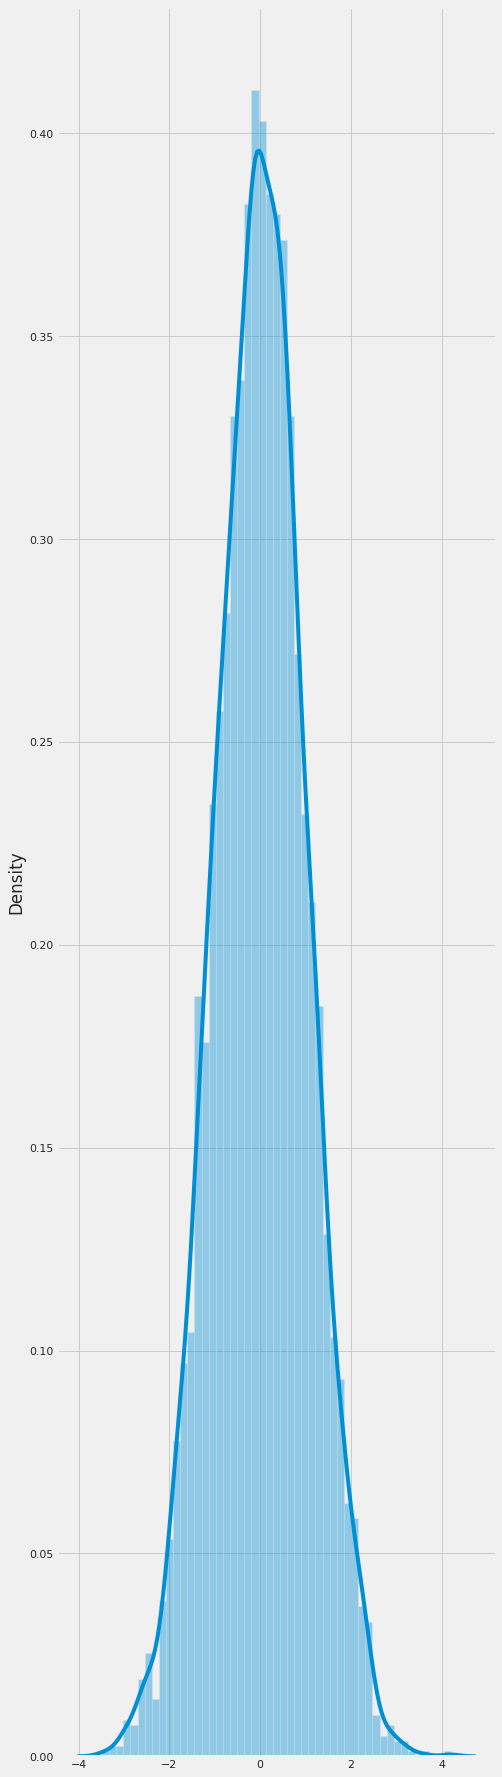

In [96]:
# create norm data, about Shapiro Wilk test, N<5000
norm_data = randn(4999)

# Visualization
sns.distplot(norm_data)

In [97]:
# with stats model
WS, p = stats.shapiro(norm_data)
print("Shapiro Wilk test p value:{}".format(p))

# with stats model
KS, p = stats.kstest(norm_data, "norm")
print("Kolmogorov–Smirnov test p value:{}".format(p))

# with stats model
statistic, critical_values, significance_level = scipy.stats.anderson(norm_data, "norm")
print("critical values:{}".format(critical_values))
print("significant_level:{}".format(significance_level))

Shapiro Wilk test p value:0.8619661331176758
Kolmogorov–Smirnov test p value:0.3091675619077184
critical values:[0.576 0.655 0.786 0.917 1.091]
significant_level:[15.  10.   5.   2.5  1. ]


If the data are normally distributed, you can reject the null hypothesis. = The data population is normally distributed.

**t-test (test for difference in mean)**

Subsequent prices are normal price values. not log.

Objective: To test the difference between 2015 and 2016 price averages. <br>

The null hypothesis: The average prices for 2015 and 2016 are same. <br>

Conflict hypothesis: The average prices for 2015 and 2016 are difference.<br>
(we cannot say that the average price for 2015 and 2016 are same.) <br>

Superiority level: 5% <br>

2015 average price:1.376410199060608
2016 average price:1.3379136851520599


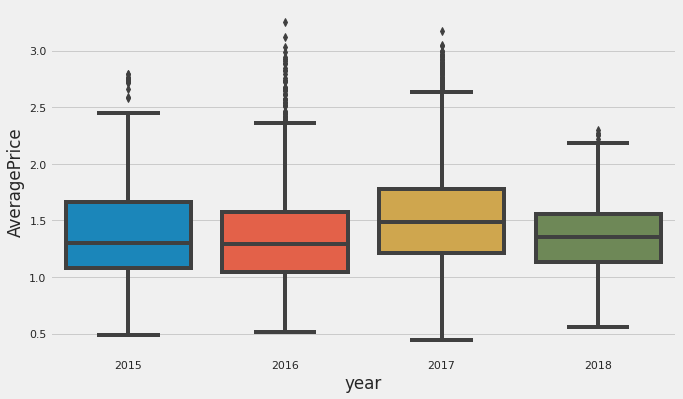

In [98]:
plt.figure(figsize=(10,6))
sns.boxplot(x="year", y="AveragePrice", data=df)
print("2015 average price:{}".format(df.query("year==2015")["AveragePrice"].mean()))
print("2016 average price:{}".format(df.query("year==2016")["AveragePrice"].mean()))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



2015 average price:1.376410199060608
2016 average price:1.3379136851520599


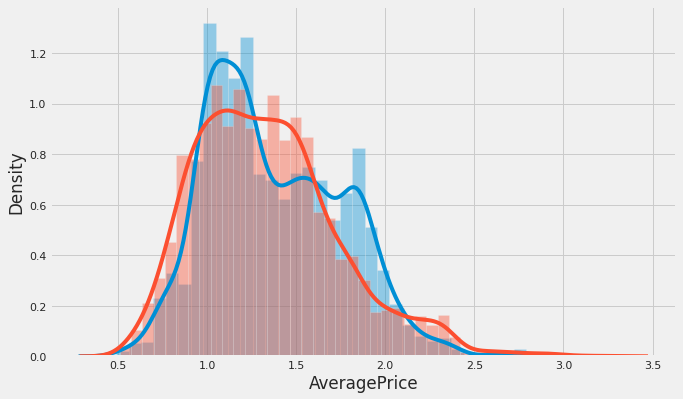

In [99]:
plt.figure(figsize=(10,6))
sns.distplot(df.query("year==2015")["AveragePrice"])
sns.distplot(df.query("year==2016")["AveragePrice"])
print("2015 average price:{}".format(df.query("year==2015")["AveragePrice"].mean()))
print("2016 average price:{}".format(df.query("year==2016")["AveragePrice"].mean()))

From the Anderson Darling test results, it can be said that there is normality because almost all the numbers are below the significance level.

**Unpaired, student t test**

In [100]:
# data
price_2015 = np.log(df.query("year==2015")["AveragePrice"].values)
price_2016 = np.log(df.query("year==2016")["AveragePrice"].values)

# with stats model, 
stats.ttest_ind(price_2015, price_2016)

Ttest_indResult(statistic=5.649976647087565, pvalue=1.6538728816787104e-08)

p-value<0.05, we can reject the null hypothesis. As a result, the average prices for 2015 and 2016 are difference.

**Unpaired, weltch t test**

In [101]:
# with stats model, equal_var=False
stats.ttest_ind(price_2015, price_2016, equal_var=False)

Ttest_indResult(statistic=5.650020177316982, pvalue=1.6536904425831686e-08)

p-value<0.05, we can reject the null hypothesis. As a result, the average prices for 2015 and 2016 are difference.

**Unpaired, Mannwhitney u test**

In [102]:
# with stats model
stats.mannwhitneyu(price_2015, price_2016)

MannwhitneyuResult(statistic=9304275.5, pvalue=6.892879072232657e-09)

p-value<0.05, we can reject the null hypothesis. As a result, the average prices for 2015 and 2016 are difference.

**Chi-square test (Test of independence)**

Objective: To test whether the average price for each type of year is independent. <br>

The null hypothesis: Average prices are independent. <br>

Conflict hypothesis: Average prices are dependent. <br>
(We cannot say that average prices are independent)

Superiority level: 5% <br>

In [103]:
# pivot table
pivot = pd.pivot_table(df, index="type", columns="year", values="AveragePrice", aggfunc="mean")
pivot.head()

year,2015,2016,2017,2018
type,,,,
conventional,1.082,1.105,1.296,1.131
organic,1.671,1.571,1.743,1.568


([<matplotlib.axis.YTick at 0x7fd438948d90>,
 <a list of 4 Text major ticklabel objects>)

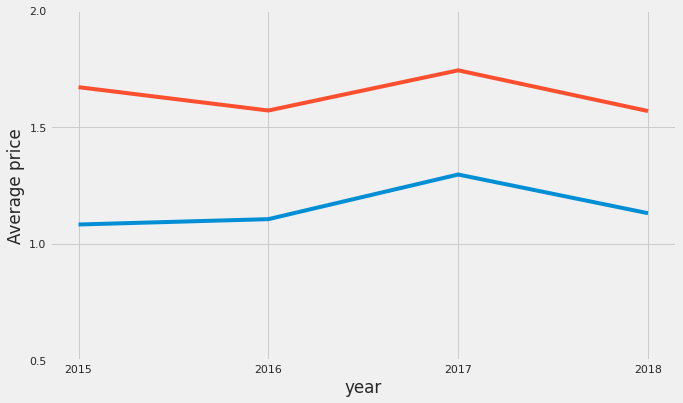

In [104]:
# visualization
plt.figure(figsize=(10,6))
plt.plot(pivot.T.index, pivot.T["conventional"])
plt.plot(pivot.T.index, pivot.T["organic"])
plt.xlabel("year")
plt.xticks([2015,2016,2017,2018])
plt.ylabel("Average price")
plt.yticks([0.5,1,1.5,2])

In [105]:
# stats model
x2, p, dof, expected = scipy.stats.chi2_contingency(pivot)

In [106]:
# result
print("x2:{}".format(x2))
print("p:{}".format(p))
print("dof:{}".format(dof))
print("expectd:\n{}".format(expected))

x2:0.007185048756443257
p:0.9998383679615522
dof:3
expectd:
[[1.13748183 1.10561497 1.25582247 1.11522641]
 [1.61547024 1.5702124  1.78353954 1.58386273]]


p-value>0.05, we cannot reject the null hypothesis. As a result, the average price are independent.

**F test (Test of variance)**

Objective: To test the difference between 2015 and 2016 price variance. <br>

The null hypothesis: The average variance for 2015 and 2016 are same. <br>

Conflict hypothesis: The average variance for 2015 and 2016 are difference.<br>
(we cannot say that the average variance for 2015 and 2016 are same.) <br>

Superiority level: 5% <br>

In [107]:
# data
price_2015 = df.query("year==2015")["AveragePrice"].values
price_2016 = df.query("year==2016")["AveragePrice"].values

# stats model
scipy.stats.bartlett(price_2015, price_2016)

BartlettResult(statistic=17.351268347851125, pvalue=3.1069085136976946e-05)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution \n variance at 2015 0.14 \n variance at 2016 0.16')

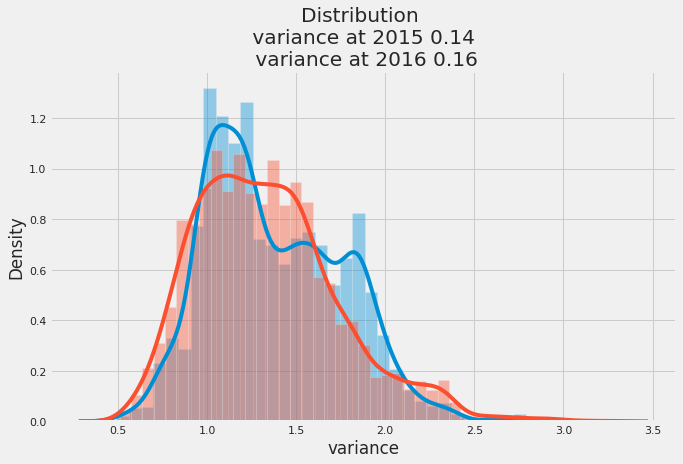

In [108]:
# Visualization check
plt.figure(figsize=(10,6))
sns.distplot(price_2015)
sns.distplot(price_2016)
plt.xlabel("variance")
plt.title("Distribution \n variance at 2015 %.2f \n variance at 2016 %.2f" % (price_2015.var(), price_2016.var()))

p-value<0.05, we can reject the null hypothesis. As a result, the variance are difference.

##### **ANOVA: 1-way analysis of variance**

Objective: Test the average price of 2015, 2016, 2017, 2018. <br>

The null hypothesis: The average variance for each year are same. <br>

Conflict hypothesis: The average variance for each year are difference.<br>
(we cannot say that the average variance for each year are same.) <br>

Superiority level: 5% <br>

2015 average price:1.376410199060608
2016 average price:1.3379136851520599
2017 average price:1.5195829675153623
2018 average price:1.3495445736434102


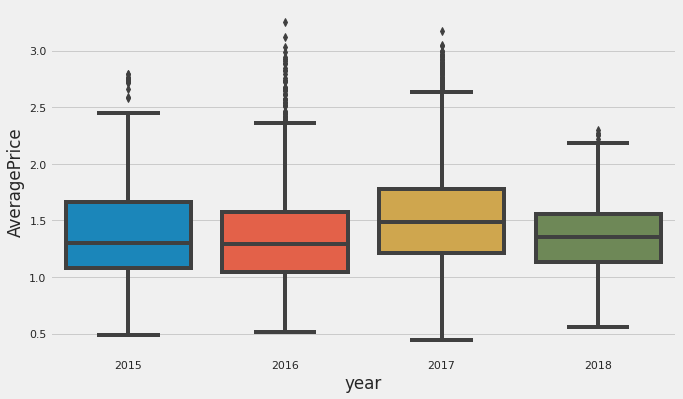

In [109]:
plt.figure(figsize=(10,6))
sns.boxplot(x="year", y="AveragePrice", data=df)
print("2015 average price:{}".format(df.query("year==2015")["AveragePrice"].mean()))
print("2016 average price:{}".format(df.query("year==2016")["AveragePrice"].mean()))
print("2017 average price:{}".format(df.query("year==2017")["AveragePrice"].mean()))
print("2018 average price:{}".format(df.query("year==2018")["AveragePrice"].mean()))

1. **Perform normality test on four data**.

In [110]:
# data
price_2015 = df.query("year==2015")["AveragePrice"].values
price_2016 = df.query("year==2016")["AveragePrice"].values
price_2017 = df.query("year==2017")["AveragePrice"].values
price_2018 = df.query("year==2018")["AveragePrice"].values

print("Shapiro Wilk test")
print("price_2015 p-value:{}:".format(stats.shapiro(price_2015[:4999])[1]))
print("price_2016 p-value:{}:".format(stats.shapiro(price_2016[:4999])[1]))
print("price_2017 p-value:{}:".format(stats.shapiro(price_2017[:4999])[1]))
print("price_2018 p-value:{}:".format(stats.shapiro(price_2018[:4999])[1]))

Shapiro Wilk test
price_2015 p-value:1.3248449217021706e-28:
price_2016 p-value:2.7911516209145e-31:
price_2017 p-value:1.657921701470116e-22:
price_2018 p-value:0.03643694147467613:


**Result - None of the data is normally distributed.**

2. **Test for homoscedasticity**

If normaly data ⇒ Bartlett test, else ⇒Levene test(It can be used to some extent even if it is not normally distributed.)

This time, I select Levene test.

The null hypothesis : equal variance for the four samples.

In [111]:
# Levene test
stats.levene(price_2015, price_2016, price_2017, price_2018)

LeveneResult(statistic=49.11293195539925, pvalue=1.424934562130016e-31)

In [112]:
# Reference - Bartlett test
stats.bartlett(price_2015, price_2016, price_2017, price_2018)

BartlettResult(statistic=263.83673933294835, pvalue=6.650043776982609e-57)

**p-value <0.5, the null hypothesis can be rejected.**

**So, need to non parametric method.**

**ANOVA with no correspondence**

The null hypothesis : Average of each year is equal.

*I could not reject the null hypothesis, but this time I will perform analysis of variance as it is because the method is recorded.*

In [113]:
# Reference) Parametric version, if can be eaual variances.
f, p = stats.f_oneway(price_2015, price_2016, price_2017, price_2018)

print("p-value:{}".format(p))

p-value:3.018780692099766e-112


**p-value<0.05, we can reject the null hypothesis. As a result, the averages are difference.**

##### **ANOVA: 2-way analysis of variance**

Objective: Test the average price of (2015, 2016, 2017, 2018) vs (conventional, organic). <br>

The null hypothesis: The average variance for each are same. <br>

Conflict hypothesis: The average variance for each are difference.<br>
(we cannot say that the average variance for each are same.) <br>

Superiority level: 5% <br>


In [114]:
# Check data frame summary
df.groupby(["year", "type"])["AveragePrice"].mean()

year  type        
2015  conventional    1.082
      organic         1.671
2016  conventional    1.105
      organic         1.571
2017  conventional    1.296
      organic         1.743
2018  conventional    1.131
      organic         1.568
Name: AveragePrice, dtype: float64

In [115]:
# Create dataframe
sample_data = df[["AveragePrice", "type", "year"]]
sample_data.head()

,AveragePrice,type,year
9593,1.49,organic,2015
10009,1.68,organic,2015
1819,1.52,conventional,2015
9333,1.64,organic,2015
2807,0.75,conventional,2015


In [116]:
# Statsmodel
formula = 'AveragePrice ~ C(type)+C(year) + C(type):C(year)'

model = ols(formula, sample_data).fit()

# Result
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     1397.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:49:22   Log-Likelihood:                -3997.1
No. Observations:               14531   AIC:                             8010.
Df Residuals:                   14523   BIC:                             8071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              1.0821      0.007    160.570      0.000       1.069       1.095
C(type)[T.organic]                     0.5887      0.010     61.765      0.000       0.570       0.607
C(year)[T.2016]                        0.0230      0.010      2.409      0.016       0.004       0.042
C(year)[T.2017]                        0.2143      0.009     22.587      0.000       0.196       0.233
C(year)[T.2018]                        0.0485      0.016      3.116      0.002       0.018       0.079
C(type)[T.organic]:C(year)[T.2016]    -0.1230      0.013     -9.129      0.000      -0.149      -0.097
C(type)[T.organic]:C(year)[T.2017]    -0.1421      0.013    -10.591      0.000      -0.168      -0.116
C(type)[T.organic]:C(year)[T.2018]    -0.1508      0.022     -6.853      0.000      -0.194      -0.108
==============================================================================
Omnibus:                      577.862   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1105.469
Skew:                           0.303   Prob(JB):                    8.92e-241
Kurtosis:                       4.207   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

                   sum_sq       df         F      PR(>F)
C(type)           892.266      1.0  8786.287   0.000e+00
C(year)            86.773      3.0   284.823  1.157e-179
C(type):C(year)    14.285      3.0    46.889   3.790e-30
Residual         1474.841  14523.0       NaN         NaN


**The p-value is small for all variables and interactions, and the null hypothesis cannot be rejected.**

**Therefore, each average is different.**

---

#### **Comparing The RMSE Values Of The Models**

In [118]:
# Linear Regression RMSE : 
print('RMSE value of the Linear Regr : ',round(np.sqrt(metrics.mean_squared_error(y_test, LinReg.predict(X_test))),4))

# Ridge RMSE             : 
print('RMSE value of the Ridge Model : ',round(np.sqrt(metrics.mean_squared_error(y_test, ridge.predict(X_test))),4))

# Lasso RMSE             : 
print('RMSE value of the Lasso Model : ',round(np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))),4))

# KNN RMSE               : 
print('RMSE value of the KNN Model   : ',round(np.sqrt(metrics.mean_squared_error(y_test, Knn.predict(X_test))),4))

# SVR RMSE               : 
print('RMSE value of the SVR Model   : ',round(np.sqrt(metrics.mean_squared_error(y_test, Svr.predict(X_test))),4))

# Decision Tree RMSE     : 
print('RMSE value of the Decis Tree  : ',round(np.sqrt(metrics.mean_squared_error(y_test, DTree.predict(X_test))),4))

# Random Forest RMSE     : 
print('RMSE value of the Rnd Forest  : ',round(np.sqrt(metrics.mean_squared_error(y_test, RForest.predict(X_test))),4))

# Times Series RMSE      : 
print('RMSE value of the TS Analysis : ',round(np.mean(df_p['rmse']),4))


RMSE value of the Linear Regr :  0.1439
RMSE value of the Ridge Model :  0.1437
RMSE value of the Lasso Model :  0.1437
RMSE value of the KNN Model   :  0.1418
RMSE value of the SVR Model   :  0.1354
RMSE value of the Decis Tree  :  0.1547
RMSE value of the Rnd Forest  :  0.1478
RMSE value of the TS Analysis :  0.132


#### **CONCLUSION**
Now, it's time to decide wheather you're interested in short term predictions or long term!

When we analyse the results, due to the RMSE (Root Mean Square Error) values, we see that:

If we need to get short period estimates, we'd better to use Time Series Analysis for this dataset. 

(MAPE= 8% and Accuracy= 92%)

MAPE - Mean Absolute Percentage Error

But, if we need longer periods prices, SVR model gives the best predicts. (Coefficient of determination of 82%)